# Análisis de los datos covid con pandas

# Lectura del fichero


In [5]:
import pandas

url = 'https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv'
sep = ','
dframe = pandas.read_csv(url, delimiter=',', parse_dates=['fecha'], index_col='fecha')
print(dframe.shape)
dframe

(715500, 7)


,provincia_iso,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
fecha,,,,,,,
2020-01-01,A,H,0-9,0,0,0,0
2020-01-01,A,H,10-19,0,0,0,0
2020-01-01,A,H,20-29,0,0,0,0
2020-01-01,A,H,30-39,0,0,0,0
2020-01-01,A,H,40-49,0,0,0,0
...,...,...,...,...,...,...,...
2021-03-25,ZA,NC,50-59,0,0,0,0
2021-03-25,ZA,NC,60-69,0,0,0,0
2021-03-25,ZA,NC,70-79,0,0,0,0


# Evolución a lo largo del tiempo

In [27]:
dframe_por_fecha = dframe.groupby(by='fecha').sum()
dframe_por_fecha

,num_casos,num_hosp,num_uci,num_def
fecha,,,,
2020-01-01,0,9,0,0
2020-01-02,0,66,1,0
2020-01-03,0,11,1,0
2020-01-04,0,11,0,0
2020-01-05,0,13,0,0
...,...,...,...,...
2021-03-13,2658,239,27,51
2021-03-14,1820,197,17,52
2021-03-15,4839,246,13,61


# Gráficas con pandas

<AxesSubplot:xlabel='fecha'>

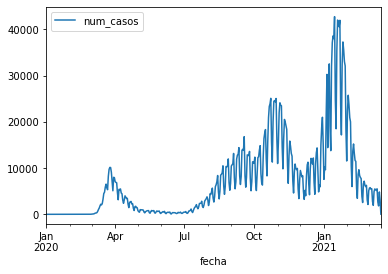

In [29]:
dframe_por_fecha.plot(y='num_casos')

# Gráficas con matplotlib

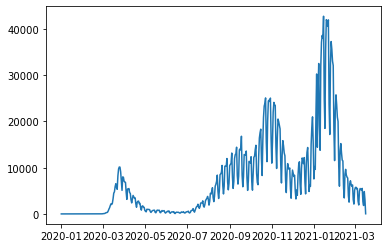

In [30]:
from matplotlib import pyplot as plt

plt.plot(dframe_por_fecha.index, dframe_por_fecha['num_casos'])

# Suma de datos semanales

<AxesSubplot:xlabel='fecha'>

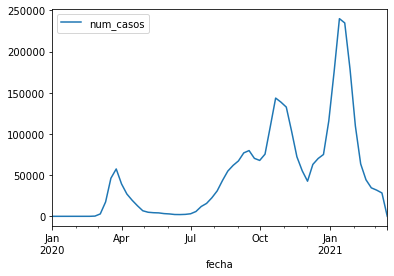

In [37]:
dframe_semanal = dframe.resample("7D").sum()
dframe_semanal.plot(y='num_casos')

# Selección de una ola

<AxesSubplot:xlabel='fecha'>

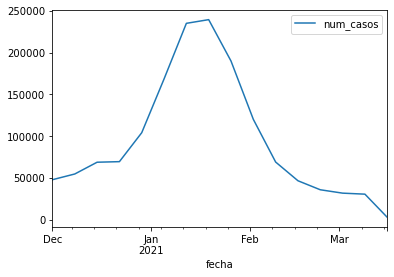

In [42]:
from datetime import datetime
date0 = datetime(year=2020, month=12, day=1)
date1 = datetime.now()
# seleccionamos indexando por fecha
tercera_ola = dframe.loc[date0:date1, :]
tercera_ola.resample('7D').sum().plot(y='num_casos')

# Análisis de una provincia

In [47]:
print(dframe['provincia_iso'].unique())
#filtramos por provincia
valencia = dframe[dframe['provincia_iso']=='V']
valencia

['A' 'AB' 'AL' 'AV' 'B' 'BA' 'BI' 'BU' 'C' 'CA' 'CC' 'CE' 'CO' 'CR' 'CS'
 'CU' 'GC' 'GI' 'GR' 'GU' 'H' 'HU' 'J' 'L' 'LE' 'LO' 'LU' 'M' 'MA' 'ML'
 'MU' nan 'NC' 'O' 'OR' 'P' 'PM' 'PO' 'S' 'SA' 'SE' 'SG' 'SO' 'SS' 'T'
 'TE' 'TF' 'TO' 'V' 'VA' 'VI' 'Z' 'ZA']


,provincia_iso,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
fecha,,,,,,,
2020-01-01,V,H,0-9,0,0,0,0
2020-01-01,V,H,10-19,0,0,0,0
2020-01-01,V,H,20-29,0,0,0,0
2020-01-01,V,H,30-39,0,0,0,0
2020-01-01,V,H,40-49,0,0,0,0
...,...,...,...,...,...,...,...
2021-03-17,V,NC,50-59,0,0,0,0
2021-03-17,V,NC,60-69,0,0,0,0
2021-03-17,V,NC,70-79,0,0,0,0


# Selección de un sexo o grupo de edad

In [4]:
print(dframe['grupo_edad'].unique())
jovenes = dframe[dframe['grupo_edad']=='20-29']
jovenes


['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80+' 'NC']


,provincia_iso,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
fecha,,,,,,,
2020-01-01,A,H,20-29,0,0,0,0
2020-01-01,A,M,20-29,0,0,0,0
2020-01-01,A,NC,20-29,0,0,0,0
2020-01-01,AB,H,20-29,0,0,0,0
2020-01-01,AB,M,20-29,0,0,0,0
...,...,...,...,...,...,...,...
2021-03-17,Z,M,20-29,0,0,0,0
2021-03-17,Z,NC,20-29,0,0,0,0
2021-03-17,ZA,H,20-29,0,0,0,0


# Incidencia acumulada por provincia

<AxesSubplot:xlabel='provincia_iso'>

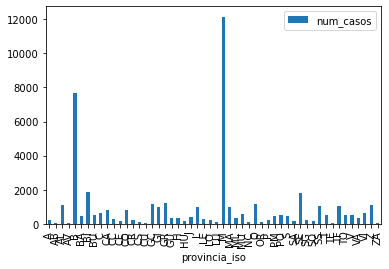

In [22]:
from datetime import datetime, timedelta
now = datetime.now()
quince_dias = timedelta(days=15)
casos_desde_hace_quince_dias = dframe.loc[now-quince_dias:now, ('provincia_iso', 'num_casos')]
casos_por_provincia = casos_desde_hace_quince_dias.groupby(by='provincia_iso').sum()
casos_por_provincia.plot.bar()

# Casos en los últimos 15 días por grupo de edad

<AxesSubplot:xlabel='grupo_edad'>

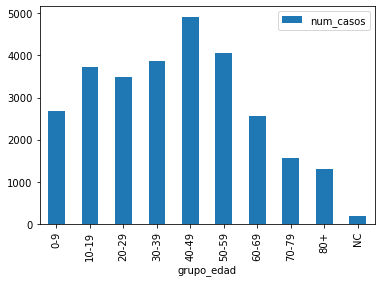

In [54]:
from datetime import datetime, timedelta
now = datetime.now()
quince_dias = timedelta(days=15)
casos_desde_hace_quince_dias = dframe.loc[now-quince_dias:now, ('grupo_edad', 'num_casos')]
casos_por_provincia = casos_desde_hace_quince_dias.groupby(by='grupo_edad').sum()
casos_por_provincia.plot.bar()


# Casos en el último mes en Valencia

<AxesSubplot:xlabel='fecha'>

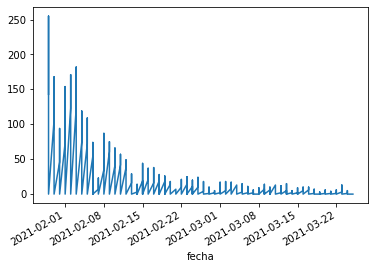

In [16]:
from datetime import datetime, timedelta

valencia_dframe = dframe[dframe['provincia_iso'] == 'V']

now = datetime.now()
mes = timedelta(days=60)

valencia_ultimo_mes = valencia_dframe.loc[now-mes:now, 'num_casos']
valencia_ultimo_mes.plot()

<AxesSubplot:xlabel='fecha'>

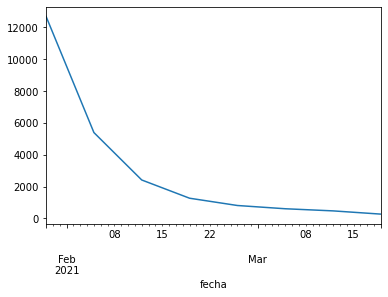

In [17]:
valencia_ultimo_mes.resample('7D').sum().plot(y='num_casos')

<AxesSubplot:xlabel='fecha'>

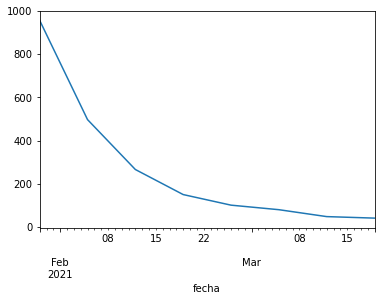

In [24]:
valencia_dframe.loc[now-mes:now, 'num_hosp'].resample('7D').sum().plot()

# ¿Y en Madrid?

<AxesSubplot:xlabel='fecha'>

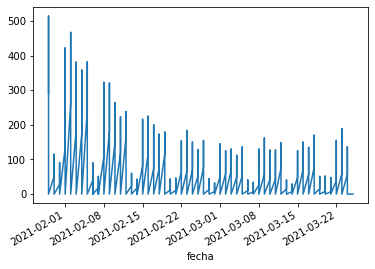

In [20]:
from datetime import datetime, timedelta

madrid_dframe = dframe[dframe['provincia_iso'] == 'M']

now = datetime.now()
mes = timedelta(days=60)

madrid_ultimo_mes = madrid_dframe.loc[now-mes:now, 'num_casos']
madrid_ultimo_mes.plot()

<AxesSubplot:xlabel='fecha'>

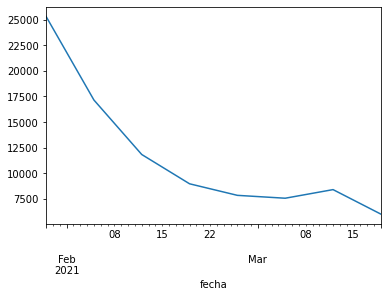

In [21]:
madrid_ultimo_mes.resample('7D').sum().plot(y='num_casos')

<AxesSubplot:xlabel='fecha'>

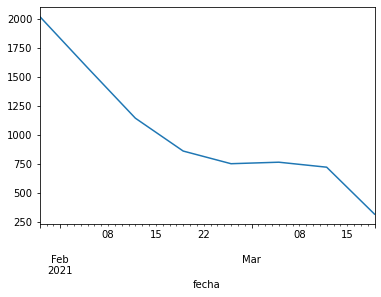

In [25]:
madrid_dframe.loc[now-mes:now, 'num_hosp'].resample('7D').sum().plot()